# 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/water.csv')
data.head(2)

,Unnamed: 0,Canal_id,year,Canal_name,Sample_water_point,TEMP. (oC),pH,DO (mg/l),H2S (mg/l),BOD (mg/l),COD (mg/l),SS (mg/l),TKN (mg/l),NH3N (mg/l),NO2 (mg/l),NO3 (mg/l),T-P (mg/l),T.Coliform (col/100ml),Sample_water_point (EN),Canal_name (EN)
0,1,12.0,2561,คลองคูเมืองเดิม,ปตร.ราชินี,25.0,8.0,2.7,0.0,5.0,42.0,26.0,2.2,0.9,0.0,2.2,0.1,930000.0,Her Royal Highness Princess Maha Chakri Sirind...,Khlong Khu Mueang Derm
1,2,13.0,2561,คลองคูเมืองเดิม,หน้ากรมที่ดิน,25.0,8.1,2.4,0.0,5.0,53.0,25.0,1.7,0.6,0.0,2.2,0.1,11000000.0,Department of Lands page,Khlong Khu Mueang Derm


In [3]:
data.shape

(917, 20)

In [4]:
data.columns

Index(['Unnamed: 0', 'Canal_id', 'year', 'Canal_name', 'Sample_water_point',
       'TEMP. (oC)', '  pH', 'DO (mg/l)', 'H2S (mg/l)', 'BOD (mg/l)',
       'COD (mg/l)', 'SS (mg/l)', 'TKN (mg/l)', 'NH3N (mg/l)', 'NO2 (mg/l)',
       'NO3 (mg/l)', 'T-P (mg/l)', 'T.Coliform (col/100ml)',
       'Sample_water_point (EN)', 'Canal_name (EN)'],
      dtype='object')

In [5]:
cols = {
    'Unnamed: 0': 'Index',
    'Canal_id': 'CID',
    'year': 'Year',
    'Canal_name': 'CN',
    'Sample_water_point': 'WSP',
    'TEMP. (oC)': 'Temp',
    '  pH': 'pH',
    'DO (mg/l)': 'DO',
    'H2S (mg/l)': 'HS',
    'BOD (mg/l)': 'BO',
    'COD (mg/l)': 'CO',
    'SS (mg/l)': 'SS',
    'TKN (mg/l)': 'TKN',
    'NH3N (mg/l)': 'AN',
    'NO2 (mg/l)': 'NO2N',
    'NO3 (mg/l)': 'NO3N',
    'T-P (mg/l)': 'TP',
    'T.Coliform (col/100ml)': 'TC',
    'Sample_water_point (EN)': 'WSPEN',
    'Canal_name (EN)': 'CNEN'
}


data = data.rename(columns=cols)
data.columns

Index(['Index', 'CID', 'Year', 'CN', 'WSP', 'Temp', 'pH', 'DO', 'HS', 'BO',
       'CO', 'SS', 'TKN', 'AN', 'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'],
      dtype='object')

# 2. Exploratory Data Analysis (EDA)

**Data Preprocessing**

In [6]:
data.describe()

,Index,CID,Year,Temp,pH,DO,HS,BO,CO,SS,TKN,AN,NO2N,NO3N,TP,TC
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,9.170000e+02
mean,459.000000,729.759324,2562.008724,28.694329,7.242007,1.667045,0.179804,12.802672,64.103762,21.953719,7.999945,4.358997,0.146205,2.123228,0.947895,2.181025e+118
std,264.859397,553.978537,0.820008,1.845115,0.462830,1.282984,0.389665,9.397183,22.350496,17.194847,5.133194,3.600244,0.131068,0.692240,0.519764,6.604582e+119
min,1.000000,12.000000,2561.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,230.000000,221.000000,2561.000000,28.500000,7.130000,0.510000,0.000000,6.250000,51.000000,12.000000,4.100000,1.500000,0.020000,1.700000,0.520000,1.220000e+08
50%,459.000000,591.000000,2562.000000,29.000000,7.290000,1.600000,0.000000,9.800000,60.500000,17.000000,7.100000,3.460000,0.110000,2.000000,0.900000,1.530000e+10
75%,688.000000,1191.000000,2563.000000,29.300000,7.400000,2.600000,0.200000,15.830000,72.100000,26.000000,10.800000,6.100000,0.210000,2.500000,1.250000,2.100000e+12
max,917.000000,1822.000000,2563.000000,31.900000,9.100000,9.700000,5.000000,84.500000,202.000000,148.300000,39.800000,23.330000,0.730000,8.600000,3.530000,2.000000e+121


Check for column types.

In [7]:
data.dtypes

Index      int64
CID      float64
Year       int64
CN        object
WSP       object
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

Drop unnecessary columns from the dataset.

In [8]:
# We have translated Canal Name and Water Source Point. So drop those columns in thai language.
data.drop(columns=['Index', 'CN', 'WSP'], inplace=True)

In [9]:
data.dtypes

CID      float64
Year       int64
Temp     float64
pH       float64
DO       float64
HS       float64
BO       float64
CO       float64
SS       float64
TKN      float64
AN       float64
NO2N     float64
NO3N     float64
TP       float64
TC       float64
WSPEN     object
CNEN      object
dtype: object

Check for null values in the dataset.

In [10]:
data.isna().sum()

CID      0
Year     0
Temp     0
pH       0
DO       0
HS       0
BO       0
CO       0
SS       0
TKN      0
AN       0
NO2N     0
NO3N     0
TP       0
TC       0
WSPEN    0
CNEN     0
dtype: int64

In [11]:
# Check and remove duplicates
print(f"Duplicate rows: {data.duplicated().sum()}")
data = data.drop_duplicates()

Duplicate rows: 0


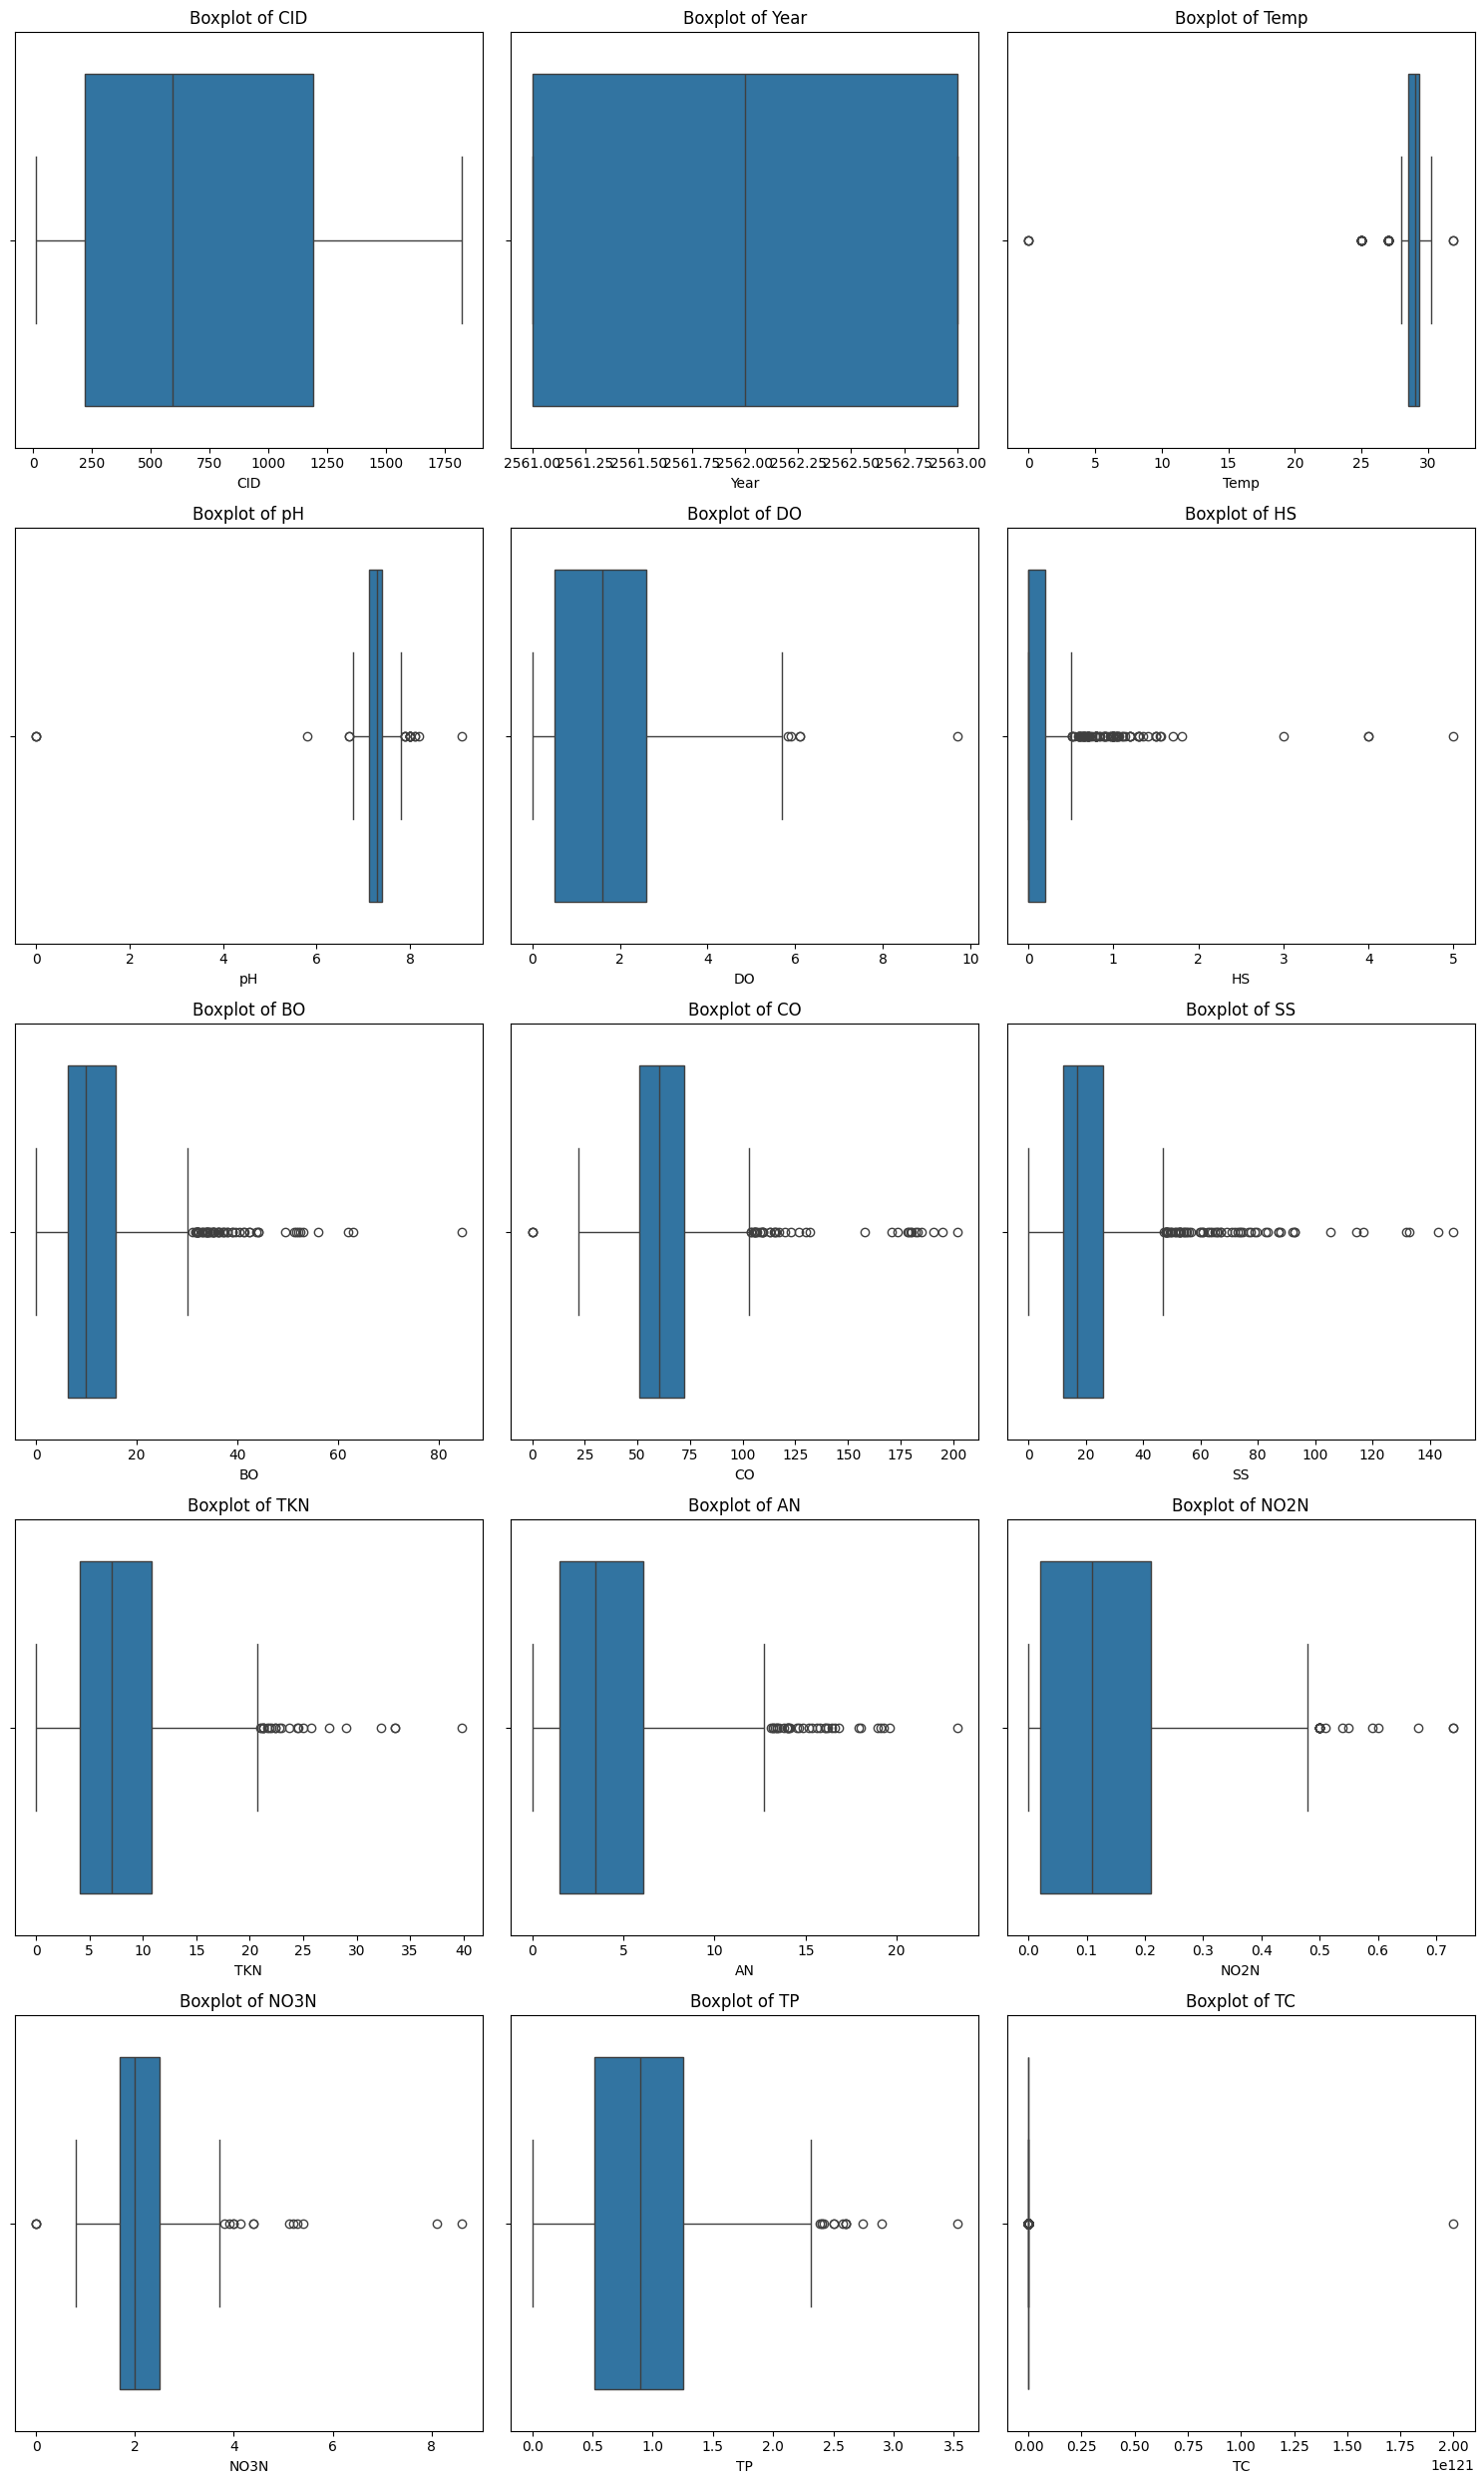

In [12]:
import math

num_cols = len(data.select_dtypes(include='number').columns)
num_rows = math.ceil(num_cols / 3)

plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(data.select_dtypes(include='number').columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


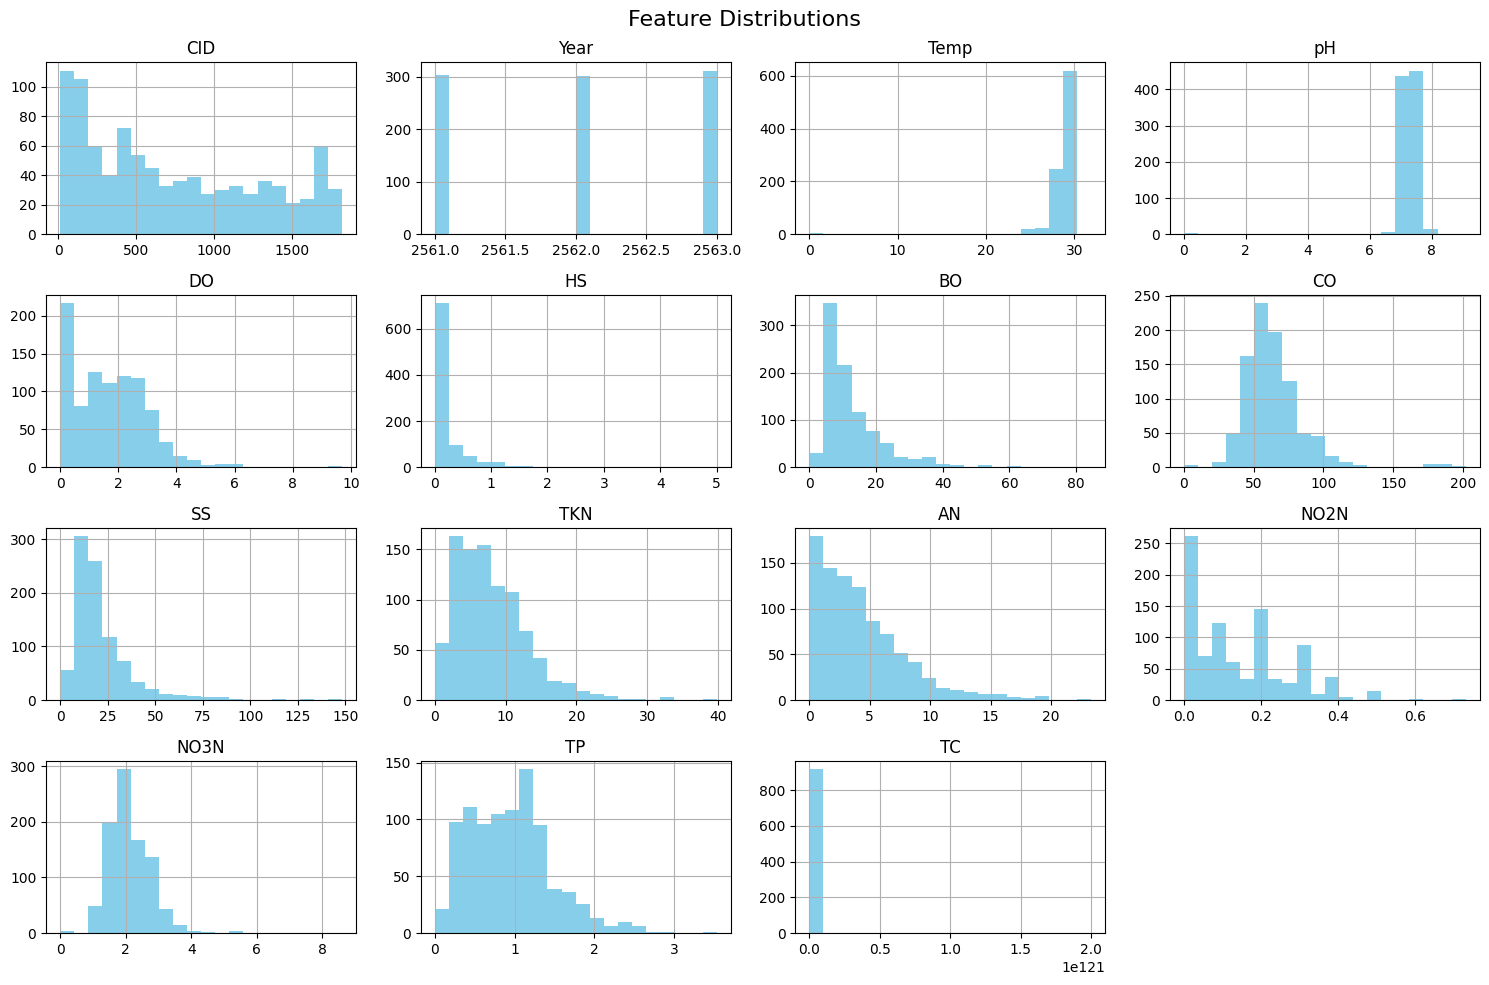

In [13]:
# Histogram/KDE plots
data.hist(bins=20, figsize=(15,10), color='skyblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


Time Trends (by Year)
If samples were taken across years:

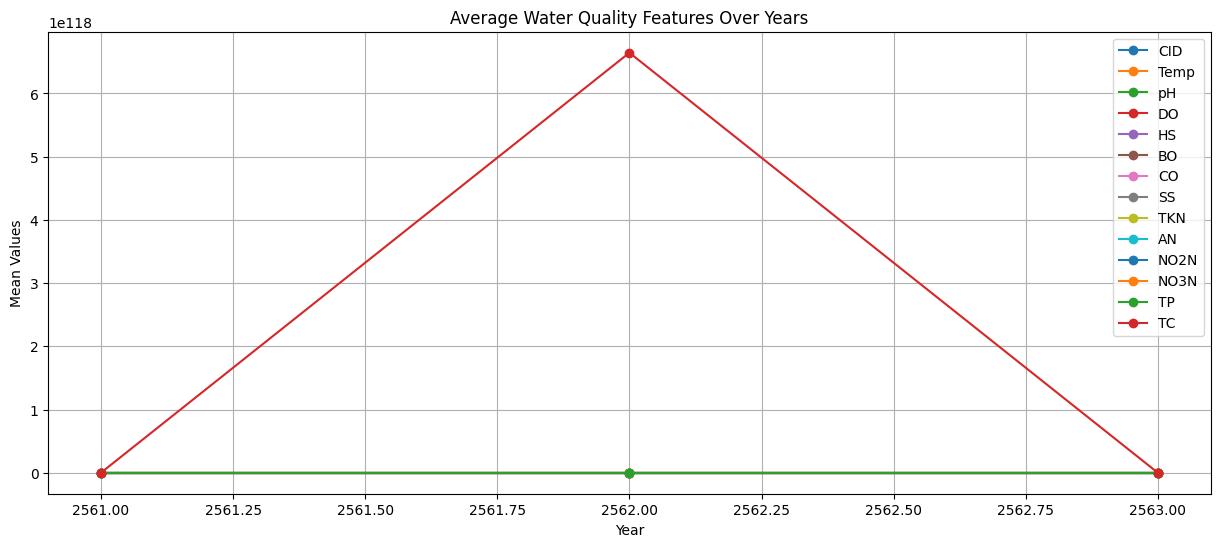

In [14]:
data.groupby('Year').mean(numeric_only=True).plot(marker='o', figsize=(15,6))
plt.title("Average Water Quality Features Over Years")
plt.xlabel("Year")
plt.ylabel("Mean Values")
plt.grid(True)
plt.show()


In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Canal_name', y='pH', data=data)
plt.xticks(rotation=90)
plt.title("pH levels across different canals")
plt.show()


ValueError: Could not interpret value `Canal_name` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

# 3. Data Cleaning

Seems we have no null values in our dataset.

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
data.columns

In [ ]:
# using label encoding for these 4 features
# as they are objects and need to be a real num or a int.

from sklearn.preprocessing import LabelEncoder

features = ["WSPEN", "CNEN"]

for feat in features:
    le = LabelEncoder()
    data[feat] = le.fit_transform(data[feat])

In [ ]:
data.head()

In [ ]:
data['TC'].describe()

In [ ]:
data.dtypes

In [ ]:
data.head(3)

# 4. Feature Engineering

Here lets engineer a new feature called ISQA (Simple Water Quality Index) using the formula 
- ISQA = ITEMP * (IBOD + ITSS + IDO)
where,
    - ITEMP = Water Temperature Index
    - IBOD = Biological Oxygen Demand Index
    - ITSS = Total Suspended Solids Index
    - IDO = Dissolved Oxygen Index

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Min-Max Scaler
scaler = MinMaxScaler()

columns_to_normalize = ["Temp", "BO", "SS", "DO"]
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Calculate ISQA
def calculate_isqa(row):
    isqa = row["Temp"] * (row["BO"] + row["SS"] + row["DO"])
    return isqa


data["ISQA"] = data.apply(calculate_isqa, axis=1)
# Rescale ISQA to be between 0 and 100
scaler_isqa = MinMaxScaler(feature_range=(0, 100))

# Reshape ISQA column to 2D for scaling
data["ISQA"] = scaler_isqa.fit_transform(data["ISQA"].values.reshape(-1, 1))

# Show the first few rows of the ISQA column
print(data["ISQA"].head())


In [ ]:
data['ISQA'].describe()

In [ ]:
# From water quality index (WQI) calculate potability and classify as 2 (safe), 1 (potentially unsafe), 0(unsafe)
def calc_water_potability(m):
    if m > 75:
        return 2
    
    if m > 50:
        return 1
    
    return 0

data['target'] = data['ISQA'].apply(calc_water_potability)
data['target'].value_counts()

Box plot of `target` variable and `NO2N` value of water.

In [ ]:
sns.boxplot(x='target', y='NO2N', data=data)
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical vs Categorical Data')
plt.show()

# 5. Model Building

Swarm plot for numerical data `pH` and categorical data `target`

In [ ]:
sns.swarmplot(x='target', y='pH', data=data)
plt.xticks(rotation=45)
plt.title('Swarm Plot of Numerical vs Categorical Data')
plt.show()

Pair plot between ph value of water and Ammonia Nitrate in water.

In [ ]:
sns.pairplot(data=data[['pH', 'AN']])
plt.suptitle('Pair Plot of pH and AN', y=1.02)
plt.show()

In [ ]:
feats = data[['Temp', 'DO', 'BO', 'CO', 'SS']]

sns.pairplot(feats, diag_kind='hist')

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=data.drop(columns=['BO', 'SS', 'Temp', 'DO', 'ISQA']).corr(numeric_only=True), annot=True)
plt.show()

In [ ]:
data['target'].value_counts()

In [ ]:
data.columns

**Feature Selection**

In [ ]:
X = data[ ['CID', 'Year', 'pH', 'HS', 'CO', 'TKN', 'AN',
       'NO2N', 'NO3N', 'TP', 'TC', 'WSPEN', 'CNEN'] ]

y = data['target']

In [ ]:
from sklearn.utils import resample

# Separate class 1
X_class1 = X[y == 1]
y_class1 = y[y == 1]

# Upsample class 0 manually (e.g., to 50)
X_class1_up, y_class1_up = resample(X_class1, y_class1,
                                    replace=True,
                                    n_samples=100,
                                    random_state=42)

# Combine with rest
X_rest = X[y != 1]
y_rest = y[y != 1]

X = np.vstack((X_rest, X_class1_up))
y = np.concatenate((y_rest, y_class1_up))

In [ ]:
from sklearn.utils import resample

# Separate class 2
X_class2 = X[y == 2]
y_class2 = y[y == 2]

# Upsample class 0 manually (e.g., to 50)
X_class2_up, y_class2_up = resample(X_class2, y_class2,
                                    replace=True,
                                    n_samples=100,
                                    random_state=42)

# Combine with rest
X_rest = X[y != 2]
y_rest = y[y != 2]

X = np.vstack((X_rest, X_class2_up))
y = np.concatenate((y_rest, y_class2_up))

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

Since we have class imbalance we need to do oversampling here.

# 6. Evaluation

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote =SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# y_train_resampled.value_counts()

Scale the features using standard scalar for faster convergence.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_resampled = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

y_train_resampled = y_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

algorithms = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

#defining splits
kfold = KFold(n_splits=7, shuffle=True)

for name, model in algorithms.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kfold, scoring='f1_weighted')
    mean_score = scores.mean()
    print(f"{name} - Score: {scores}; Mean: {scores.mean()}")

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 10, 20, 30],        # maximum depth of each tree
    'max_features': ['sqrt', 'log2', None], # number of features to consider when looking for best split
    'bootstrap': [True, False]              # whether bootstrap samples are used
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=-1,
                           verbose=2,
                           scoring='f1_weighted')

# Fit to training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

In [ ]:
grid_search.best_estimator_

In [ ]:
import joblib

model_name = 'wpp_model.pkl'

joblib.dump(grid_search.best_estimator_, model_name)

In [ ]:
# Load the model
loaded_model = joblib.load(model_name)

# Make predictions
y_pred = loaded_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

In [ ]:
# Compute correlation matrix and display as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Countplot to visualize distribution of the target variable
sns.countplot(x='Potability', data=data)
plt.title('Distribution of Potability')
plt.xlabel('Potability (0 = Not Safe, 1 = Safe)')
plt.ylabel('Count')
plt.show()